### Main Code

$$ C(u) = \sum_{i=0}^n N_{i,p}(u)P_i $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# B-spline basis function
def N(i,p,t,T):
    if p == 0:
        return 1 if T[i] <= t < T[i+1] else 0
    if T[i+p] == T[i]:
        c1 = 0
    else:
        c1 = (t - T[i])/(T[i+p] - T[i]) * N(i,p-1,t,T)
    if T[i+p+1] == T[i+1]:
        c2 = 0
    else:
        c2 = (T[i+p+1] - t)/(T[i+p+1] - T[i+1]) * N(i+1,p-1,t,T)
    return c1 + c2

# B-spline curve
def S(t,p,T,C):
    n = len(T) - p - 1
    return sum(C[i]*N(i,p,t,T) for i in range(n))




### Periodic - Knot Vecotr

$$ \text{Knot vector length} = n + p + 1$$

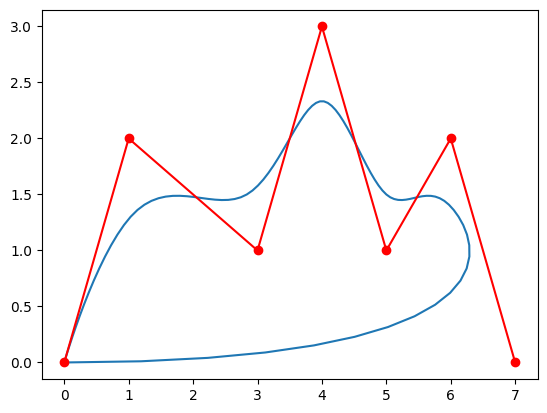

In [3]:
# Control points
C = np.array([[0,0],[1,2],[3,1],[4,3],[5,1],[6,2],[7,0]])

# Non periodic Knot vector
T = [0,0,0,1,2,3,4,5,6,6,6]

# Plot B-spline curve
t = np.linspace(0,6,100)
x = [S(i,3,T,C[:,0]) for i in t]
y = [S(i,3,T,C[:,1]) for i in t]

plt.plot(x,y)
# Plot control points with connecting lines
plt.plot(C[:,0],C[:,1],'ro-')
plt.show()

### Non - Periodic Knot Vector

- First and last elements of knot vector must repeat $ (p+1)$ times

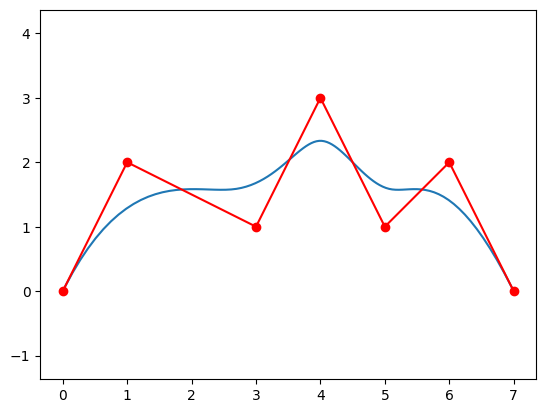

In [4]:
# Control points
C = np.array([[0,0], [1,2], [3,1], [4,3], [5,1], [6,2], [7,0]])

# Knot vector for non-periodic B-spline
T = [0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4]

# Plot B-spline curve
t = np.linspace(0.01, 3.99, 100)
x = [S(i, 3, T, C[:,0]) for i in t]
y = [S(i, 3, T, C[:,1]) for i in t]

plt.plot(x, y)
# Plot control points with connecting lines
plt.plot(C[:,0], C[:,1], 'ro-')
plt.axis('equal')
plt.show()

### A Closed Rectange

#### Periodic

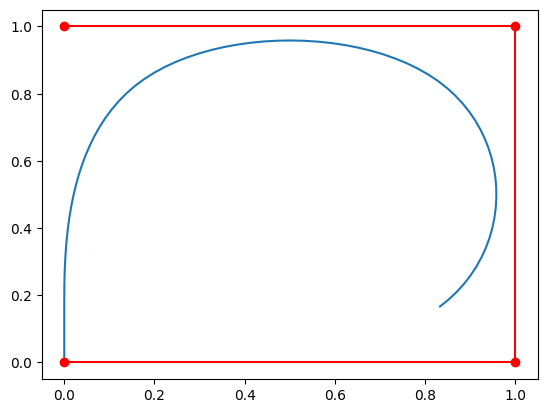

In [10]:
# Control points
C = np.array([[0,0],[1,0],[1,1],[0,1]])

# Non periodic Knot vector
T = [-3,-2,-1,0,1,2,3,4]

# Plot B-spline curve
t = np.linspace(0,4,100)
x = [S(i,3,T,C[:,0]) for i in t]
y = [S(i,3,T,C[:,1]) for i in t]

plt.plot(x,y)
# Plot control points with connecting lines
plt.plot(C[:,0],C[:,1],'ro-')
plt.show()

#### Non Periodic

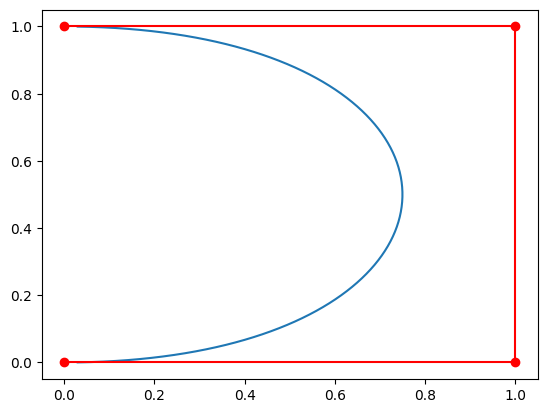

In [56]:
# Control points
C = np.array([[0,0],[1,0],[1,1],[0,1]])

# Non periodic Knot vector
T = [0,0,0,0,1,1,1,1]

# Plot B-spline curve
t = np.linspace(0.01,0.99,100)
x = [S(i,3,T,C[:,0]) for i in t]
y = [S(i,3,T,C[:,1]) for i in t]

plt.plot(x,y)
# Plot control points with connecting lines
plt.plot(C[:,0],C[:,1],'ro-')
plt.show()